# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.model_selection import cross_val_score
import sys
import sklearn
import numpy as np
import os
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [4]:
df = pd.read_csv('data/reviews_sentiment.csv', delimiter=';')

In [5]:
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [7]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating. Realiza otras visualizaciones para ver la relación de tus datos.

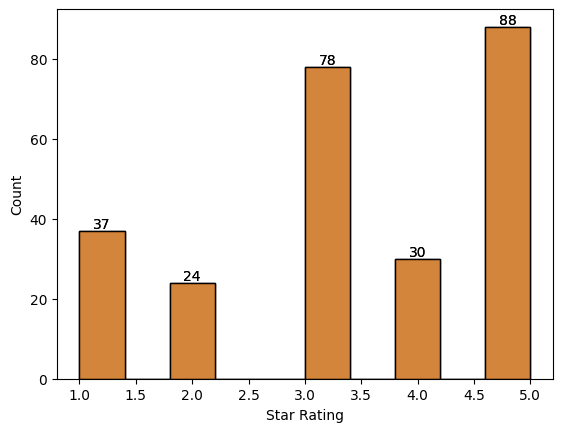

In [12]:
sns.histplot(df['Star Rating'])
ax = sns.histplot(df['Star Rating'])

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

<Axes: >

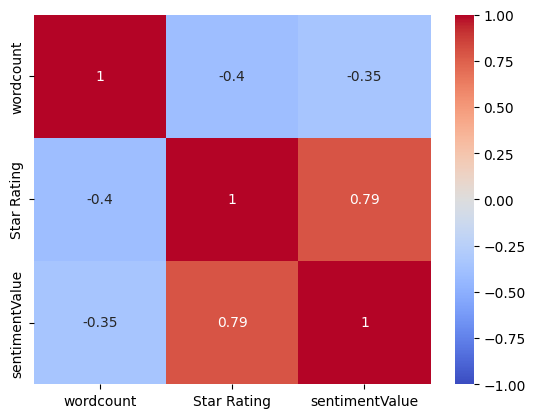

In [14]:
sns.heatmap(df.corr(numeric_only= True), annot = True, vmin= -1, vmax= 1, cmap = 'coolwarm')

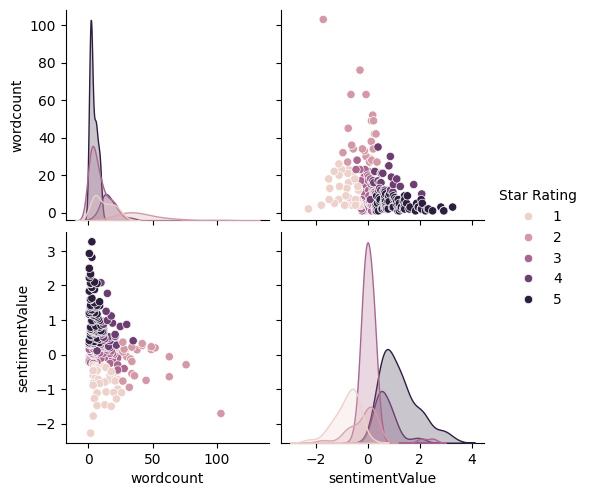

In [16]:
sns.pairplot(df, hue = 'Star Rating')

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [19]:
x = df[['sentimentValue', 'wordcount']]
y = df['Star Rating']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 10 )

In [22]:
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(257, 2)
(257,)
(205, 2)
(52, 2)
(205,)
(52,)


## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [26]:
scaler.fit(x_train)
x_train_scal = scaler.transform(x_train)
x_test_scal = scaler.transform(x_test)

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_train_scal, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_test)

c:\Users\Hugo Trabajo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## Evalúa tu modelo

In [37]:
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("R²:", metrics.r2_score(y_test, y_pred))

MSE: 3.4423076923076925
MAE: 1.5576923076923077
R²: -0.7736280487804876


## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [ ]:
k_list = []
accuracy_list = []
for k in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    k_list.append(k)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    
    print('K =', k)
    print('Predicciones:', y_pred)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('-' * 50)

K = 1
Predicciones: [5 4 3 1 3 4 1 5 5 3 2 1 5 3 5 3 3 3 5 3 4 3 3 4 1 5 3 4 5 4 1 3 3 4 5 5 3
 1 3 5 3 3 5 1 5 3 5 3 1 4 5 5]
Accuracy: 0.7692307692307693
--------------------------------------------------
K = 2
Predicciones: [5 3 3 1 3 4 1 5 5 3 1 1 5 3 5 3 3 3 5 3 4 3 3 2 1 5 3 4 5 3 1 3 3 4 3 5 3
 1 3 5 1 3 5 1 5 3 5 3 1 3 5 5]
Accuracy: 0.7115384615384616
--------------------------------------------------
K = 3
Predicciones: [5 3 3 1 3 4 1 5 5 3 1 3 5 3 5 3 3 3 5 3 4 3 3 2 1 5 3 4 5 3 1 3 5 4 5 5 3
 1 3 5 3 3 5 1 5 3 5 3 3 3 5 5]
Accuracy: 0.6538461538461539
--------------------------------------------------
K = 4
Predicciones: [5 3 3 2 3 4 2 5 5 3 2 1 5 1 5 3 3 3 5 3 4 3 3 2 1 3 3 4 5 3 1 3 3 4 3 5 3
 1 3 5 3 3 5 1 5 3 5 3 3 3 5 5]
Accuracy: 0.6730769230769231
--------------------------------------------------
K = 5
Predicciones: [5 3 3 2 3 4 2 5 5 3 2 1 5 1 5 3 3 3 5 3 4 3 3 2 1 5 3 4 5 3 1 3 3 4 3 5 3
 1 4 5 3 4 5 1 5 3 5 3 1 3 5 3]
Accuracy: 0.7115384615384616
----------------

Text(0.5, 1.0, 'K vs Accuracy')

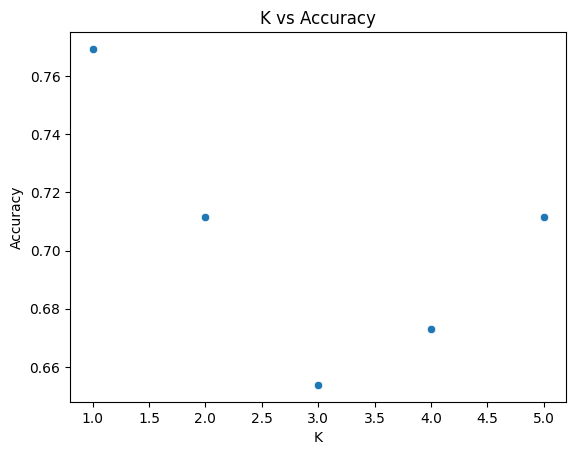

In [44]:
sns.scatterplot(x = k_list, y = accuracy_list)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')

El valor que mejor resuelve la accuracy es  k=1

## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [46]:
df.head(2)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187


In [49]:
new_df = pd.DataFrame({'wordcount': [5],
    'sentimentValue': [1]})

In [50]:
new_df

,wordcount,sentimentValue
0,5,1


In [54]:
scaler.fit(new_df)
new_df_scal = scaler.transform(new_df)

In [56]:
pred = knn.predict(new_df_scal)
pred

c:\Users\Hugo Trabajo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([3])

Nos predice un rating de 3 para 5 palabras y sentimiento 1.